In [1861]:
pip install --upgrade scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [1862]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline

In [1863]:
df = pd.read_csv("application_record.csv")
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [1864]:
df.shape

(438557, 18)

In [1865]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [1866]:
df['ID'].duplicated().sum()

47

In [1867]:
# Drop duplicates
#df=df.drop_duplicates(subset=df.columns[1:], keep='first')
df = df.drop_duplicates(subset='ID',keep='first')

In [1868]:
df.shape

(438510, 18)

In [1869]:
df.columns[1:]

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [1870]:
df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134193
CNT_FAM_MEMBERS             0
dtype: int64

In [1871]:
df['CODE_GENDER'].unique()
df['FLAG_OWN_CAR'].unique()
df['FLAG_OWN_REALTY'].unique()
df['NAME_INCOME_TYPE'].unique()
df['NAME_EDUCATION_TYPE'].unique()
df['NAME_FAMILY_STATUS'].unique()
df['NAME_HOUSING_TYPE'].unique()

array(['Rented apartment', 'House / apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [1872]:
df['FLAG_MOBIL'].value_counts()


1    438510
Name: FLAG_MOBIL, dtype: int64

In [1873]:
df['FLAG_WORK_PHONE'].unique()

array([1, 0])

In [1874]:
df['FLAG_PHONE'].unique()

array([0, 1])

In [1875]:
df['FLAG_EMAIL'].unique()

array([0, 1])

In [1876]:
df['OCCUPATION_TYPE'].value_counts(dropna=False)

NaN                      134193
Laborers                  78231
Core staff                43000
Sales staff               41094
Managers                  35481
Drivers                   26090
High skill tech staff     17285
Accountants               15983
Medicine staff            13518
Cooking staff              8076
Security staff             7993
Cleaning staff             5843
Private service staff      3455
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: OCCUPATION_TYPE, dtype: int64

In [1877]:
df['OCCUPATION_TYPE'].fillna('not_specified',inplace=True)

In [1878]:
df['OCCUPATION_TYPE'].value_counts(dropna=False)

not_specified            134193
Laborers                  78231
Core staff                43000
Sales staff               41094
Managers                  35481
Drivers                   26090
High skill tech staff     17285
Accountants               15983
Medicine staff            13518
Cooking staff              8076
Security staff             7993
Cleaning staff             5843
Private service staff      3455
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: OCCUPATION_TYPE, dtype: int64

In [1879]:
df1 = pd.read_csv("credit_record.csv")
df1.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [1880]:
df1.shape

(1048575, 3)

In [1881]:
df1.info

<bound method DataFrame.info of               ID  MONTHS_BALANCE STATUS
0        5001711               0      X
1        5001711              -1      0
2        5001711              -2      0
3        5001711              -3      0
4        5001712               0      C
...          ...             ...    ...
1048570  5150487             -25      C
1048571  5150487             -26      C
1048572  5150487             -27      C
1048573  5150487             -28      C
1048574  5150487             -29      C

[1048575 rows x 3 columns]>

In [1882]:
df1.duplicated().sum()

0

In [1883]:
df1['MONTHS_BALANCE'].unique()

array([  0,  -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10, -11, -12,
       -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25,
       -26, -27, -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38,
       -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -49, -50, -51,
       -52, -53, -54, -55, -56, -57, -58, -59, -60])

In [1884]:
df1['STATUS'].unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

In [1885]:
df1[df1['STATUS'].isin(['X','C'])]

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [1886]:
df1['ID'].nunique()

45985

In [1887]:
df1['target'] = df1['STATUS'].replace({'C': 1, 'X': 1})
#df1['target'].replace({'0': 1}, inplace=True)
df1['target'] = df1['target'].astype(int)
df1.loc[df1['target']==0,'target']=0
df1.loc[df1['target']>=2,'target']=0

df1

,ID,MONTHS_BALANCE,STATUS,target
0,5001711,0,X,1
1,5001711,-1,0,0
2,5001711,-2,0,0
3,5001711,-3,0,0
4,5001712,0,C,1
...,...,...,...,...
1048570,5150487,-25,C,1
1048571,5150487,-26,C,1
1048572,5150487,-27,C,1
1048573,5150487,-28,C,1


In [1888]:
df2=pd.DataFrame(df1.groupby(['ID'])['target'].agg("max")).reset_index()
df2["target"].value_counts()
df2
#this is the cleaned credit dataset

,ID,target
0,5001711,1
1,5001712,1
2,5001713,1
3,5001714,1
4,5001715,1
...,...,...
45980,5150482,1
45981,5150483,1
45982,5150484,1
45983,5150485,0


In [1889]:
df[df['DAYS_EMPLOYED']>=0]['DAYS_EMPLOYED'].value_counts()

365243    75324
Name: DAYS_EMPLOYED, dtype: int64

In [1890]:
df['DAYS_EMPLOYED'].replace(365243,0,inplace=True)

In [1891]:
df[df['DAYS_EMPLOYED']>=0]['DAYS_EMPLOYED'].value_counts()

0    75324
Name: DAYS_EMPLOYED, dtype: int64

In [1892]:
df['AGE_YEARS']=round(-df['DAYS_BIRTH']/365.2425,0)

In [1893]:
df['YEARS_EMPLOYED']=round(-df['DAYS_EMPLOYED']/365.2425)
df.loc[df['YEARS_EMPLOYED']<0,'YEARS_EMPLOYED']=0

In [1894]:
df.drop(columns=["DAYS_BIRTH","DAYS_EMPLOYED"],inplace=True)

In [1895]:
df['ID'].duplicated().sum()
df.shape

(438510, 18)

In [1896]:
df[df['AMT_INCOME_TOTAL']>540000]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED
267,5009092,M,Y,Y,1,765000.0,Working,Higher education,Married,House / apartment,1,1,0,0,Managers,3.0,33.0,3.0
268,5009094,M,Y,Y,1,765000.0,Working,Higher education,Married,House / apartment,1,1,0,0,Managers,3.0,33.0,3.0
269,5009095,M,Y,Y,1,765000.0,Working,Higher education,Married,House / apartment,1,1,0,0,Managers,3.0,33.0,3.0
270,6153741,M,Y,Y,1,765000.0,Working,Higher education,Married,House / apartment,1,1,0,0,Managers,3.0,33.0,3.0
492,5009359,F,Y,N,0,900000.0,Working,Higher education,Single / not married,House / apartment,1,0,0,0,Managers,1.0,52.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438095,6630576,F,Y,Y,1,675000.0,Pensioner,Higher education,Civil marriage,House / apartment,1,0,0,1,Managers,3.0,42.0,3.0
438255,6697842,M,N,Y,0,675000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,0,1,Managers,1.0,43.0,5.0
438294,6715605,M,Y,Y,3,585000.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,0,Managers,5.0,40.0,8.0
438295,6715606,M,Y,Y,3,585000.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,0,Managers,5.0,40.0,8.0


In [1897]:
df.drop(columns=["FLAG_MOBIL"],inplace=True)
df.drop(columns=["FLAG_WORK_PHONE"],inplace=True)
df.drop(columns=["FLAG_EMAIL"],inplace=True)
df.drop(columns=["FLAG_PHONE"],inplace=True)

In [1898]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,not_specified,2.0,33.0,12.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,not_specified,2.0,33.0,12.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,Security staff,2.0,59.0,3.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1.0,52.0,8.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1.0,52.0,8.0


In [1899]:
# Define a dictionary mapping the values to be replaced to the replacement value
replacement = {'Lower secondary': 'NO GED',
                   'Secondary / secondary special': 'NO GED',
                   'Incomplete higher': 'NO GED'}

# Replace the values in the 'NAME_EDUCATION_TYPE' column using the dictionary
df['NAME_EDUCATION_TYPE'].replace(replacement, inplace=True)

In [1900]:
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,not_specified,2.0,33.0,12.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,not_specified,2.0,33.0,12.0
2,5008806,M,Y,Y,0,112500.0,Working,NO GED,Married,House / apartment,Security staff,2.0,59.0,3.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,NO GED,Single / not married,House / apartment,Sales staff,1.0,52.0,8.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,NO GED,Single / not married,House / apartment,Sales staff,1.0,52.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,NO GED,Separated,House / apartment,not_specified,1.0,62.0,0.0
438553,6840222,F,N,N,0,103500.0,Working,NO GED,Single / not married,House / apartment,Laborers,1.0,44.0,8.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,Sales staff,1.0,22.0,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,NO GED,Married,House / apartment,not_specified,2.0,59.0,0.0


In [1901]:
# Define a dictionary mapping the values to be replaced to the replacement value
replacement_value = {'Civil marriage': 'Married'}

# Replace the values in the 'NAME_EDUCATION_TYPE' column using the dictionary
df['NAME_FAMILY_STATUS'].replace(replacement_value, inplace=True)

In [1902]:
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Married,Rented apartment,not_specified,2.0,33.0,12.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Married,Rented apartment,not_specified,2.0,33.0,12.0
2,5008806,M,Y,Y,0,112500.0,Working,NO GED,Married,House / apartment,Security staff,2.0,59.0,3.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,NO GED,Single / not married,House / apartment,Sales staff,1.0,52.0,8.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,NO GED,Single / not married,House / apartment,Sales staff,1.0,52.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,NO GED,Separated,House / apartment,not_specified,1.0,62.0,0.0
438553,6840222,F,N,N,0,103500.0,Working,NO GED,Single / not married,House / apartment,Laborers,1.0,44.0,8.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,Sales staff,1.0,22.0,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,NO GED,Married,House / apartment,not_specified,2.0,59.0,0.0


In [1903]:
df = df[df['CNT_FAM_MEMBERS'] <= 9]

In [1904]:
df.shape

(438497, 14)

In [1905]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438497 entries, 0 to 438556
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438497 non-null  int64  
 1   CODE_GENDER          438497 non-null  object 
 2   FLAG_OWN_CAR         438497 non-null  object 
 3   FLAG_OWN_REALTY      438497 non-null  object 
 4   CNT_CHILDREN         438497 non-null  int64  
 5   AMT_INCOME_TOTAL     438497 non-null  float64
 6   NAME_INCOME_TYPE     438497 non-null  object 
 7   NAME_EDUCATION_TYPE  438497 non-null  object 
 8   NAME_FAMILY_STATUS   438497 non-null  object 
 9   NAME_HOUSING_TYPE    438497 non-null  object 
 10  OCCUPATION_TYPE      438497 non-null  object 
 11  CNT_FAM_MEMBERS      438497 non-null  float64
 12  AGE_YEARS            438497 non-null  float64
 13  YEARS_EMPLOYED       438497 non-null  float64
dtypes: float64(4), int64(2), object(8)
memory usage: 50.2+ MB


In [1906]:
df3=pd.merge(df2,df,how='inner',on=['ID'])

In [1907]:
df3

,ID,target,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED
0,5008804,1,M,Y,Y,0,427500.0,Working,Higher education,Married,Rented apartment,not_specified,2.0,33.0,12.0
1,5008805,1,M,Y,Y,0,427500.0,Working,Higher education,Married,Rented apartment,not_specified,2.0,33.0,12.0
2,5008806,1,M,Y,Y,0,112500.0,Working,NO GED,Married,House / apartment,Security staff,2.0,59.0,3.0
3,5008808,1,F,N,Y,0,270000.0,Commercial associate,NO GED,Single / not married,House / apartment,Sales staff,1.0,52.0,8.0
4,5008809,1,F,N,Y,0,270000.0,Commercial associate,NO GED,Single / not married,House / apartment,Sales staff,1.0,52.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36448,5150482,1,F,Y,Y,1,157500.0,Working,NO GED,Married,House / apartment,Core staff,3.0,30.0,5.0
36449,5150483,1,F,Y,Y,1,157500.0,Working,NO GED,Married,House / apartment,Core staff,3.0,30.0,5.0
36450,5150484,1,F,Y,Y,1,157500.0,Working,NO GED,Married,House / apartment,Core staff,3.0,30.0,5.0
36451,5150485,0,F,Y,Y,1,157500.0,Working,NO GED,Married,House / apartment,Core staff,3.0,30.0,5.0


In [1908]:
start_df = pd.DataFrame(df1.groupby(['ID'])['MONTHS_BALANCE'].agg(min)).reset_index()

start_df.rename(columns={'MONTHS_BALANCE': 'ACCOUNT_LENGTH'}, inplace=True)

start_df['ACCOUNT_LENGTH'] = -start_df['ACCOUNT_LENGTH']

In [1909]:
start_df

,ID,ACCOUNT_LENGTH
0,5001711,3
1,5001712,18
2,5001713,21
3,5001714,14
4,5001715,59
...,...,...
45980,5150482,28
45981,5150483,17
45982,5150484,12
45983,5150485,1


In [1910]:
df3=pd.merge(df3,start_df,how='inner', on=['ID'])

In [1911]:
df3

,ID,target,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED,ACCOUNT_LENGTH
0,5008804,1,M,Y,Y,0,427500.0,Working,Higher education,Married,Rented apartment,not_specified,2.0,33.0,12.0,15
1,5008805,1,M,Y,Y,0,427500.0,Working,Higher education,Married,Rented apartment,not_specified,2.0,33.0,12.0,14
2,5008806,1,M,Y,Y,0,112500.0,Working,NO GED,Married,House / apartment,Security staff,2.0,59.0,3.0,29
3,5008808,1,F,N,Y,0,270000.0,Commercial associate,NO GED,Single / not married,House / apartment,Sales staff,1.0,52.0,8.0,4
4,5008809,1,F,N,Y,0,270000.0,Commercial associate,NO GED,Single / not married,House / apartment,Sales staff,1.0,52.0,8.0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36448,5150482,1,F,Y,Y,1,157500.0,Working,NO GED,Married,House / apartment,Core staff,3.0,30.0,5.0,28
36449,5150483,1,F,Y,Y,1,157500.0,Working,NO GED,Married,House / apartment,Core staff,3.0,30.0,5.0,17
36450,5150484,1,F,Y,Y,1,157500.0,Working,NO GED,Married,House / apartment,Core staff,3.0,30.0,5.0,12
36451,5150485,0,F,Y,Y,1,157500.0,Working,NO GED,Married,House / apartment,Core staff,3.0,30.0,5.0,1


In [1912]:
df3.describe()

,ID,target,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED,ACCOUNT_LENGTH
count,3.645300e+04,36453.000000,36453.000000,3.645300e+04,36453.000000,36453.000000,36453.000000,36453.000000
mean,5.078228e+06,0.882040,0.428689,1.866846e+05,2.196911,43.746962,6.036897,26.163965
std,4.187702e+04,0.322565,0.725639,1.017935e+05,0.899489,11.514353,6.488405,16.501004
min,5.008804e+06,0.000000,0.000000,2.700000e+04,1.000000,21.000000,0.000000,0.000000
25%,5.042027e+06,1.000000,0.000000,1.215000e+05,2.000000,34.000000,1.000000,12.000000
50%,5.074615e+06,1.000000,0.000000,1.575000e+05,2.000000,43.000000,4.000000,24.000000
75%,5.115397e+06,1.000000,1.000000,2.250000e+05,3.000000,53.000000,9.000000,39.000000
max,5.150487e+06,1.000000,7.000000,1.575000e+06,9.000000,69.000000,43.000000,60.000000


In [1913]:


# Specify the file path where you want to save the CSV file
file_path = 'example.csv'

# Save the DataFrame to a CSV file
df3.to_csv(file_path, index=False)  # Set index=False to exclude row numbers in the output

print("DataFrame successfully saved to", file_path)


DataFrame successfully saved to example.csv


In [1914]:
y = df3["target"]
X = df3.drop(["target","ID"], axis=1)
le = LabelEncoder()
X['CODE_GENDER'] = le.fit_transform(X['CODE_GENDER'])
X['FLAG_OWN_CAR'] = le.fit_transform(X['FLAG_OWN_CAR'])
X['FLAG_OWN_REALTY'] = le.fit_transform(X['FLAG_OWN_REALTY'])
X['NAME_INCOME_TYPE'] = le.fit_transform(X['NAME_INCOME_TYPE'])
X['NAME_EDUCATION_TYPE'] = le.fit_transform(X['NAME_EDUCATION_TYPE'])
X['NAME_FAMILY_STATUS'] = le.fit_transform(X['NAME_FAMILY_STATUS'])
X['NAME_HOUSING_TYPE'] = le.fit_transform(X['NAME_HOUSING_TYPE'])
X['OCCUPATION_TYPE'] = le.fit_transform(X['OCCUPATION_TYPE'])
X.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED,ACCOUNT_LENGTH
0,1,1,1,0,427500.0,4,1,0,4,18,2.0,33.0,12.0,15
1,1,1,1,0,427500.0,4,1,0,4,18,2.0,33.0,12.0,14
2,1,1,1,0,112500.0,4,2,0,1,16,2.0,59.0,3.0,29
3,0,0,1,0,270000.0,0,2,2,1,14,1.0,52.0,8.0,4
4,0,0,1,0,270000.0,0,2,2,1,14,1.0,52.0,8.0,26


In [1915]:
# Using 3 Way Holdout for Testing, Validation, and Training set
#X_temp, X_test, y_temp, y_test = \
 #       train_test_split(X, y, test_size=0.2, 
 #                        shuffle=True, random_state=123, stratify=y)
#X_train, X_valid, y_train, y_valid = \
 #       train_test_split(X_temp, y_temp, test_size=0.2,
  #                       shuffle=True, random_state=123, stratify=y_temp)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=123, stratify=y)

In [1916]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


In [1917]:
# Importing the 'SMOTE' (Synthetic Minority Over-sampling Technique) from 'imblearn.over_sampling'
from imblearn.over_sampling import SMOTE

# Creating an instance of the 'SMOTE' object with a random state of 42
smote = SMOTE(random_state=42)

# Resampling the training data (X_train and y_train) using the 'SMOTE' technique to balance the classes
# The number of samples in the minority class will be increased by generating synthetic samples
X_train, y_train = smote.fit_resample(X_train_std, y_train)

In [1918]:
# Importing the 'RandomForestClassifier' and 'RFE' (Recursive Feature Elimination) from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# Setting the number of features to select using RFE to 8
n_features_to_select = 8

# Creating an instance of 'RandomForestClassifier' with a random state of 123
rf_classifier = RandomForestClassifier(random_state=123)

# Creating an instance of 'RFE' with the RandomForestClassifier as the estimator and the specified number of features to select
rf = RFE(estimator=rf_classifier, n_features_to_select=n_features_to_select)

# Fitting the RFE to the resampled training data (X_train_resampled, y_train_resampled) to select the best features
rf.fit(X_train, y_train)



RFE(estimator=RandomForestClassifier(random_state=123), n_features_to_select=8)

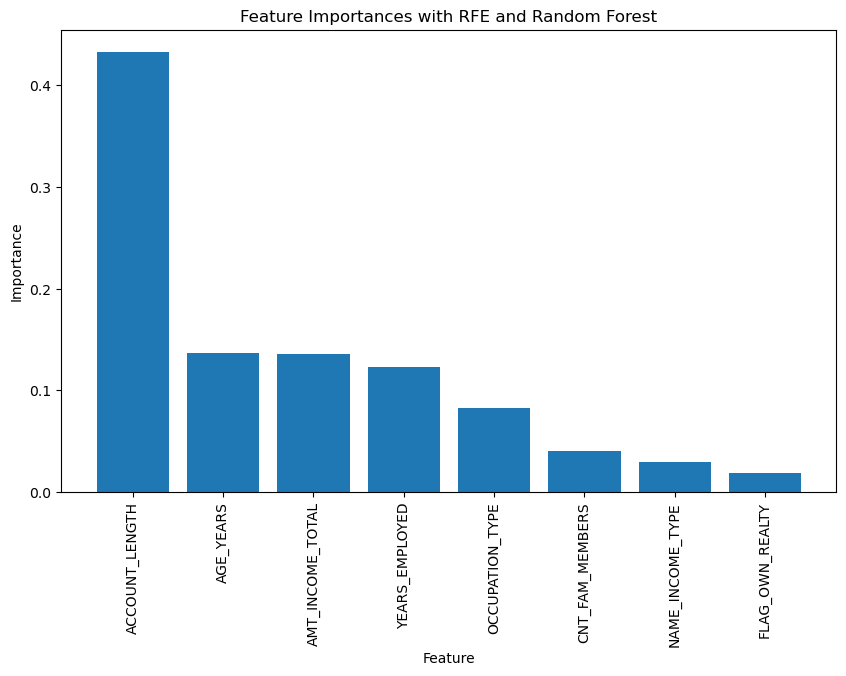

In [1919]:
# Importing the 'matplotlib.pyplot' as 'plt'
import matplotlib.pyplot as plt

# Getting the names of the selected features based on RFE support
selected_features = X.columns[rf.support_]

# Getting the feature importances from the RandomForestClassifier
feature_importances = rf.estimator_.feature_importances_

# Sorting the feature indices based on their importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Sorting the feature names and importances based on the sorted indices
sorted_features = selected_features[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Creating a bar plot to visualize the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(range(len(sorted_importances)), sorted_features, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances with RFE and Random Forest")
plt.show()

Gradient Boosting Training Accuracy Score before feature selection: 0.9846629344529975
Gradient Boosting Test Accuracy Score before feature selection: 0.87985
Gradient Boosting Training Accuracy Score before feature selection: 0.9823303009097271
Gradient Boosting Test Accuracy Score after feature selection: 0.87903
Confusion Matrix for Gradient Boosting:
     0     1
0  226   634
1  248  6183


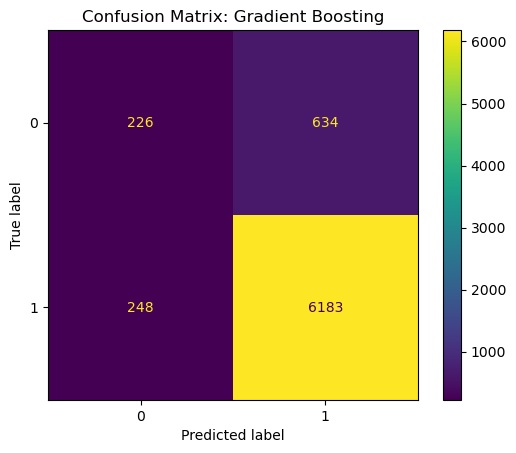

In [1920]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Assuming X_train, X_test, y_train, and y_test are already defined

# Instantiate the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=8, random_state=123)
gb_model.fit(X_train,y_train)
y_predict_gb = gb_model.predict(X_test_std)
accuracy_gb = accuracy_score(y_test, y_predict_gb)
y_pred_train = gb_model.predict(X_train)
training_accuracy = accuracy_score(y_train, y_pred_train)
print("Gradient Boosting Training Accuracy Score before feature selection:", training_accuracy)
print('Gradient Boosting Test Accuracy Score before feature selection: {:.5f}'.format(accuracy_gb))

# Perform feature selection using RFE
#rfe = make_pipeline(RFE(estimator=gb_model, n_features_to_select=8, step=1), GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=8, random_state=123))
#rfe = RFE(estimator=gb_model, n_features_to_select=8, step=1)
rfe = make_pipeline(rf, gb_model)
rfe.fit(X_train, y_train)
y_predict_gb = rfe.predict(X_test_std)
accuracy_gb = accuracy_score(y_test, y_predict_gb)
y_pred_train = rfe.predict(X_train)
training_accuracy = accuracy_score(y_train, y_pred_train)
print("Gradient Boosting Training Accuracy Score before feature selection:", training_accuracy)
print('Gradient Boosting Test Accuracy Score after feature selection: {:.5f}'.format(accuracy_gb))

# Confusion matrix
conf_matrix_gb = confusion_matrix(y_test, y_predict_gb)
print('Confusion Matrix for Gradient Boosting:')
print(pd.DataFrame(conf_matrix_gb))

# Plot confusion matrix
disp_gb = ConfusionMatrixDisplay(conf_matrix_gb)
disp_gb.plot()
plt.title('Confusion Matrix: Gradient Boosting')
plt.show()

#print('Training accuracy:', rfe.score(X_train, y_train))
#print('Test accuracy:', rfe.score(X_test_std, y_test))

In [1921]:
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict_gb)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict_gb)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict_gb)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict_gb)))

Accuracy Score is 0.87903
F1 Score is 0.93342
Precision Score is 0.907
Recall Score is 0.96144


XG Boost Training Accuracy Score before feature selection: 0.9711919757406111
XG Boost Test Accuracy Score before feature selection: 0.88397
XG Boost Training Accuracy Score before feature selection: 0.9676347095871238
XG Boost Test Accuracy Score after feature selection: 0.88205
Confusion Matrix for XG Boost:
     0     1
0  211   649
1  211  6220


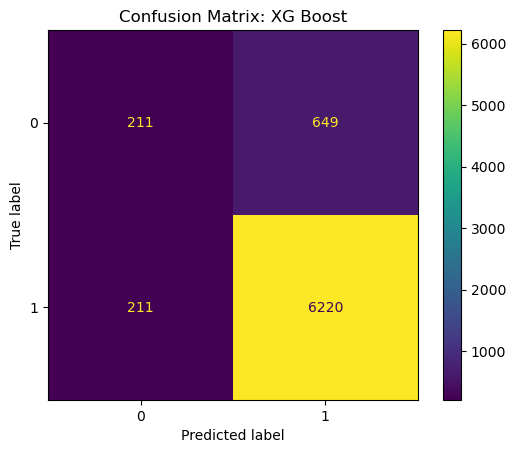

In [1922]:
import xgboost as xgb

# Assuming X_train, X_test, y_train, and y_test are already defined

# Instantiate the XGBoost classifier
xgb_model = xgb.XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=8, random_state=123)
xgb_model.fit(X_train,y_train)
y_predict_xgb = xgb_model.predict(X_test_std)
accuracy_xgb = accuracy_score(y_test, y_predict_xgb)
y_pred_train = xgb_model.predict(X_train)
training_accuracy = accuracy_score(y_train, y_pred_train)
print("XG Boost Training Accuracy Score before feature selection:", training_accuracy)
print('XG Boost Test Accuracy Score before feature selection: {:.5f}'.format(accuracy_xgb))

# Perform feature selection using RFE
#rfe = RFE(estimator=xgb_model, n_features_to_select=8, step=1)
rfe = make_pipeline(rf, xgb_model)
rfe.fit(X_train, y_train)
y_predict_xgb = rfe.predict(X_test_std)
accuracy_xgb = accuracy_score(y_test, y_predict_xgb)
y_pred_train = rfe.predict(X_train)
training_accuracy = accuracy_score(y_train, y_pred_train)
print("XG Boost Training Accuracy Score before feature selection:", training_accuracy)
print('XG Boost Test Accuracy Score after feature selection: {:.5f}'.format(accuracy_xgb))

# Confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_predict_xgb)
print('Confusion Matrix for XG Boost:')
print(pd.DataFrame(conf_matrix_xgb))

# Plot confusion matrix
disp_xgb = ConfusionMatrixDisplay(conf_matrix_xgb)
disp_xgb.plot()
plt.title('Confusion Matrix: XG Boost')
plt.show()

#print('Training accuracy:', rfe.score(X_train, y_train))
#print('Test accuracy:', rfe.score(X_test_std, y_test))

In [1923]:
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict_xgb)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict_xgb)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict_xgb)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict_xgb)))

Accuracy Score is 0.88205
F1 Score is 0.93534
Precision Score is 0.90552
Recall Score is 0.96719


Ada Boost Training Accuracy Score before feature selection: 0.797877303475624
Ada Boost Test Accuracy Score before feature selection: 0.78796
Ada Boost Training Accuracy Score before feature selection: 0.8019594121763471
Ada Boost Test Accuracy Score after feature selection: 0.79056
Confusion Matrix for Ada Boost:
      0     1
0   553   307
1  1220  5211


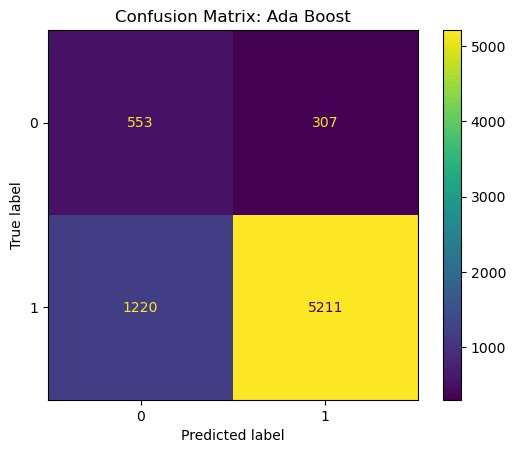

In [1924]:
from sklearn.ensemble import AdaBoostClassifier

# Assuming X_train, X_test, y_train, and y_test are already defined

# Instantiate the Ada Boost classifier
ada_model = AdaBoostClassifier(n_estimators=500,  random_state=123, algorithm='SAMME')
ada_model.fit(X_train,y_train)
y_predict_ada = ada_model.predict(X_test_std)
accuracy_ada = accuracy_score(y_test, y_predict_ada)
y_pred_train = ada_model.predict(X_train)
training_accuracy = accuracy_score(y_train, y_pred_train)
print("Ada Boost Training Accuracy Score before feature selection:", training_accuracy)
print('Ada Boost Test Accuracy Score before feature selection: {:.5f}'.format(accuracy_ada))

# Perform feature selection using RFE
#rfe = RFE(estimator=ada_model, n_features_to_select=8, step=1)
rfe = make_pipeline(rf, ada_model)
rfe.fit(X_train, y_train)
y_predict_ada = rfe.predict(X_test_std)
accuracy_ada = accuracy_score(y_test, y_predict_ada)
y_pred_train = rfe.predict(X_train)
training_accuracy = accuracy_score(y_train, y_pred_train)
print("Ada Boost Training Accuracy Score before feature selection:", training_accuracy)
print('Ada Boost Test Accuracy Score after feature selection: {:.5f}'.format(accuracy_ada))

# Confusion matrix
conf_matrix_ada = confusion_matrix(y_test, y_predict_ada)
print('Confusion Matrix for Ada Boost:')
print(pd.DataFrame(conf_matrix_ada))

# Plot confusion matrix
disp_ada = ConfusionMatrixDisplay(conf_matrix_ada)
disp_ada.plot()
plt.title('Confusion Matrix: Ada Boost')
plt.show()

#print('Training accuracy:', rfe.score(X_train, y_train))
#print('Test accuracy:', rfe.score(X_test_std, y_test))

In [1925]:
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict_ada)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict_ada)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict_ada)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict_ada)))

Accuracy Score is 0.79056
F1 Score is 0.87221
Precision Score is 0.94436
Recall Score is 0.81029


Random Forest Training Accuracy Score before feature selection: 0.9943044864318482
Random Forest Test Accuracy Score before feature selection: 0.86737
Random Forest Training Accuracy Score before feature selection: 0.9938379597231941
Random Forest Test Accuracy Score after feature selection: 0.86435
Confusion Matrix for Random Forest:
     0     1
0  350   510
1  479  5952


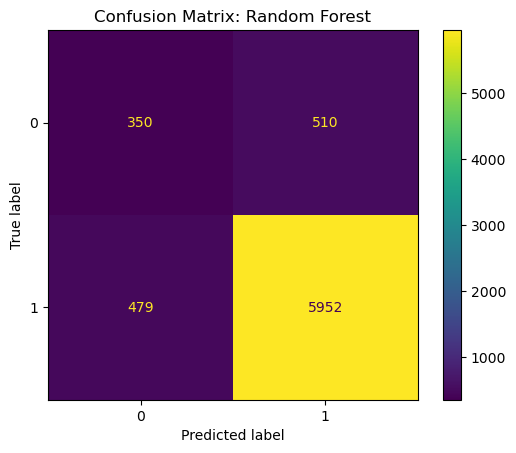

In [1926]:
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train, X_test, y_train, and y_test are already defined

# Instantiate the Random Forest classifier

#model = RandomForestClassifier(n_estimators=250,
 #                             max_depth=12,
  #                            min_samples_leaf=16
   #                           )
model=RandomForestClassifier(n_estimators=500, random_state=123)
model.fit(X_train,y_train)
y_predict = model.predict(X_test_std)
accuracy = accuracy_score(y_test, y_predict)
y_pred_train = model.predict(X_train)
training_accuracy = accuracy_score(y_train, y_pred_train)
print("Random Forest Training Accuracy Score before feature selection:", training_accuracy)
print('Random Forest Test Accuracy Score before feature selection: {:.5f}'.format(accuracy))

# Perform feature selection using RFE
#rfe = RFE(estimator=model, n_features_to_select=8, step=1)
rfe = make_pipeline(rf, model)
rfe.fit(X_train, y_train)
y_predict = rfe.predict(X_test_std)
accuracy = accuracy_score(y_test, y_predict)
y_pred_train = rfe.predict(X_train)
training_accuracy = accuracy_score(y_train, y_pred_train)
print("Random Forest Training Accuracy Score before feature selection:", training_accuracy)
print('Random Forest Test Accuracy Score after feature selection: {:.5f}'.format(accuracy))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)
print('Confusion Matrix for Random Forest:')
print(pd.DataFrame(conf_matrix))

# Plot confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()
plt.title('Confusion Matrix: Random Forest')
plt.show()

#print('Training accuracy:', rfe.score(X_train, y_train))
#print('Test accuracy:', rfe.score(X_test_std, y_test))

In [1927]:
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict)))

Accuracy Score is 0.86435
F1 Score is 0.92329
Precision Score is 0.92108
Recall Score is 0.92552


Decision Tree Training Accuracy Score before feature selection: 0.8560959489930798
Decision Tree Test Accuracy Score before feature selection: 0.84954
Decision Tree Training Accuracy Score after feature selection: 0.8546574916413965
Decision Tree Test Accuracy Score after feature selection: 0.85750
Confusion Matrix for Decision Tree:
     0     1
0  333   527
1  512  5919


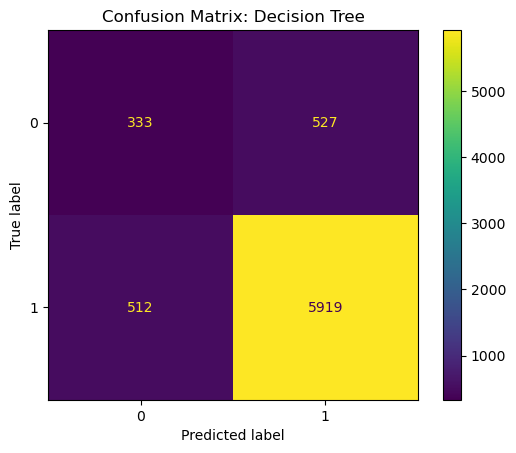

In [1928]:
from sklearn.tree import DecisionTreeClassifier

# Assuming X_train, X_test, y_train, and y_test are already defined


dt_model = DecisionTreeClassifier(max_depth=12,
                               min_samples_split=8,
                               random_state=123)
dt_model.fit(X_train,y_train)
y_predict_dt = dt_model.predict(X_test_std)
accuracy_dt = accuracy_score(y_test, y_predict_dt)
y_pred_train = dt_model.predict(X_train)
training_accuracy = accuracy_score(y_train, y_pred_train)
print("Decision Tree Training Accuracy Score before feature selection:", training_accuracy)
print('Decision Tree Test Accuracy Score before feature selection: {:.5f}'.format(accuracy_dt))

# Perform feature selection using RFE
#rfe = RFE(estimator=dt_model, n_features_to_select=8, step=1)
rfe = make_pipeline(rf, dt_model)
rfe.fit(X_train, y_train)
y_predict_dt = rfe.predict(X_test_std)
accuracy_dt = accuracy_score(y_test, y_predict_dt)
y_pred_train = rfe.predict(X_train)
training_accuracy = accuracy_score(y_train, y_pred_train)
print("Decision Tree Training Accuracy Score after feature selection:", training_accuracy)
print('Decision Tree Test Accuracy Score after feature selection: {:.5f}'.format(accuracy_dt))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict_dt)
print('Confusion Matrix for Decision Tree:')
print(pd.DataFrame(conf_matrix))

# Plot confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()
plt.title('Confusion Matrix: Decision Tree')
plt.show()

#print('Training accuracy:', rfe.score(X_train, y_train))
#print('Test accuracy:', rfe.score(X_test_std, y_test))

In [1929]:
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict_dt)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict_dt)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict_dt)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict_dt)))

Accuracy Score is 0.8575
F1 Score is 0.91931
Precision Score is 0.91824
Recall Score is 0.92039


Logistic Regression Training Accuracy Score before feature selection: 0.7346629344529975
Logistic Regression Test Accuracy Score before feature selection: 0.67426
Logistic Regression Training Accuracy Score before feature selection: 0.7344296710986704
Logistic Regression Test Accuracy Score after feature selection: 0.66987
Confusion Matrix for Logistic Regression:
      0     1
0   654   206
1  2201  4230


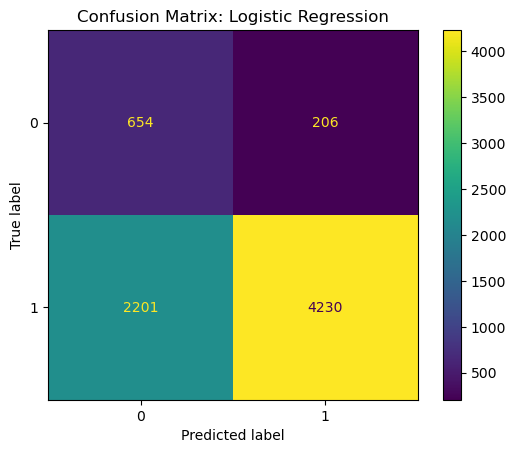

In [1930]:
# Instantiate the Logistic Regression

lg_model = LogisticRegression(C=0.1,
                           solver='liblinear',
                           multi_class='ovr',
                           random_state=123,
                           penalty='l1')
lg_model.fit(X_train, y_train)
y_predict_lg = lg_model.predict(X_test_std)
accuracy_lg = accuracy_score(y_test, y_predict_lg)
y_pred_train = lg_model.predict(X_train)
training_accuracy = accuracy_score(y_train, y_pred_train)
print("Logistic Regression Training Accuracy Score before feature selection:", training_accuracy)
print('Logistic Regression Test Accuracy Score before feature selection: {:.5f}'.format(accuracy_lg))

# Perform feature selection using RFE
#rfe = make_pipeline(RFE(estimator=LogisticRegression(), n_features_to_select=8, step=1), lg_model)
rfe = make_pipeline(rf, lg_model)
rfe.fit(X_train, y_train)


y_predict_lg = rfe.predict(X_test_std)
accuracy_lg = accuracy_score(y_test, y_predict_lg)
y_pred_train = rfe.predict(X_train)
training_accuracy = accuracy_score(y_train, y_pred_train)
print("Logistic Regression Training Accuracy Score before feature selection:", training_accuracy)
print('Logistic Regression Test Accuracy Score after feature selection: {:.5f}'.format(accuracy_lg))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict_lg)
print('Confusion Matrix for Logistic Regression:')
print(pd.DataFrame(conf_matrix))

# Plot confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()
plt.title('Confusion Matrix: Logistic Regression')
plt.show()

#print('Training accuracy:', rfe.score(X_train, y_train))
#print('Test accuracy:', rfe.score(X_test_std, y_test))

In [1931]:
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict_lg)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict_lg)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict_lg)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict_lg)))

Accuracy Score is 0.66987
F1 Score is 0.7785
Precision Score is 0.95356
Recall Score is 0.65775
